In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt 

In [3]:
#Lat-LT Plots
timeplot = np.linspace(0, 24, 49)
timeconv_plot_ticks = np.arange(0,25, dtype=float)

In [12]:
def plot_Lat_LT_average_line_from_netcdf(nc_filename1, nc_filename2):

    ds1 = xr.open_dataset(nc_filename1)
    ds2 = xr.open_dataset(nc_filename2)
    
    seasonal_data1 = {season: ds1[season].values for season in ds1.data_vars}
    seasonal_data2 = {season: ds2[season].values for season in ds2.data_vars}

    season_names = list(seasonal_data1.keys())

    avg_data1 = {season: np.mean(data, axis=0) for season, data in seasonal_data1.items()}
    avg_data2 = {season: np.mean(data, axis=0) for season, data in seasonal_data2.items()}

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
    axes = axes.flatten()

    for i, (season, avg_values1) in enumerate(avg_data1.items()):
        ax = axes[i]

        ax.plot(timeplot, avg_values1, label=f"SMax", 
                color='red', linewidth=2, linestyle='-')

        ax.plot(timeplot, avg_data2[season], label=f"Climate Change", 
                color='blue', linewidth=2, linestyle='-')
        
        ax.set_title(f"Occurance Frequency for {season}", fontsize=12)
        ax.set_xlabel("Local Time / hrs", fontsize=10)
        ax.set_ylabel("Occurance Frequency (%)", fontsize=10)
        
        xticks_waccm = np.linspace(0, 24, 13)
        ax.set_xticks(xticks_waccm)
        ax.set_xticklabels(xticks_waccm.astype(int))
        
        ax.grid(True, linestyle='--', alpha=0.6)
        ax.legend(title="Run", fontsize=8)

    
    plt.suptitle("Comparison of Average occurace rates", fontsize=16)
    plt.tight_layout()
    plt.show()

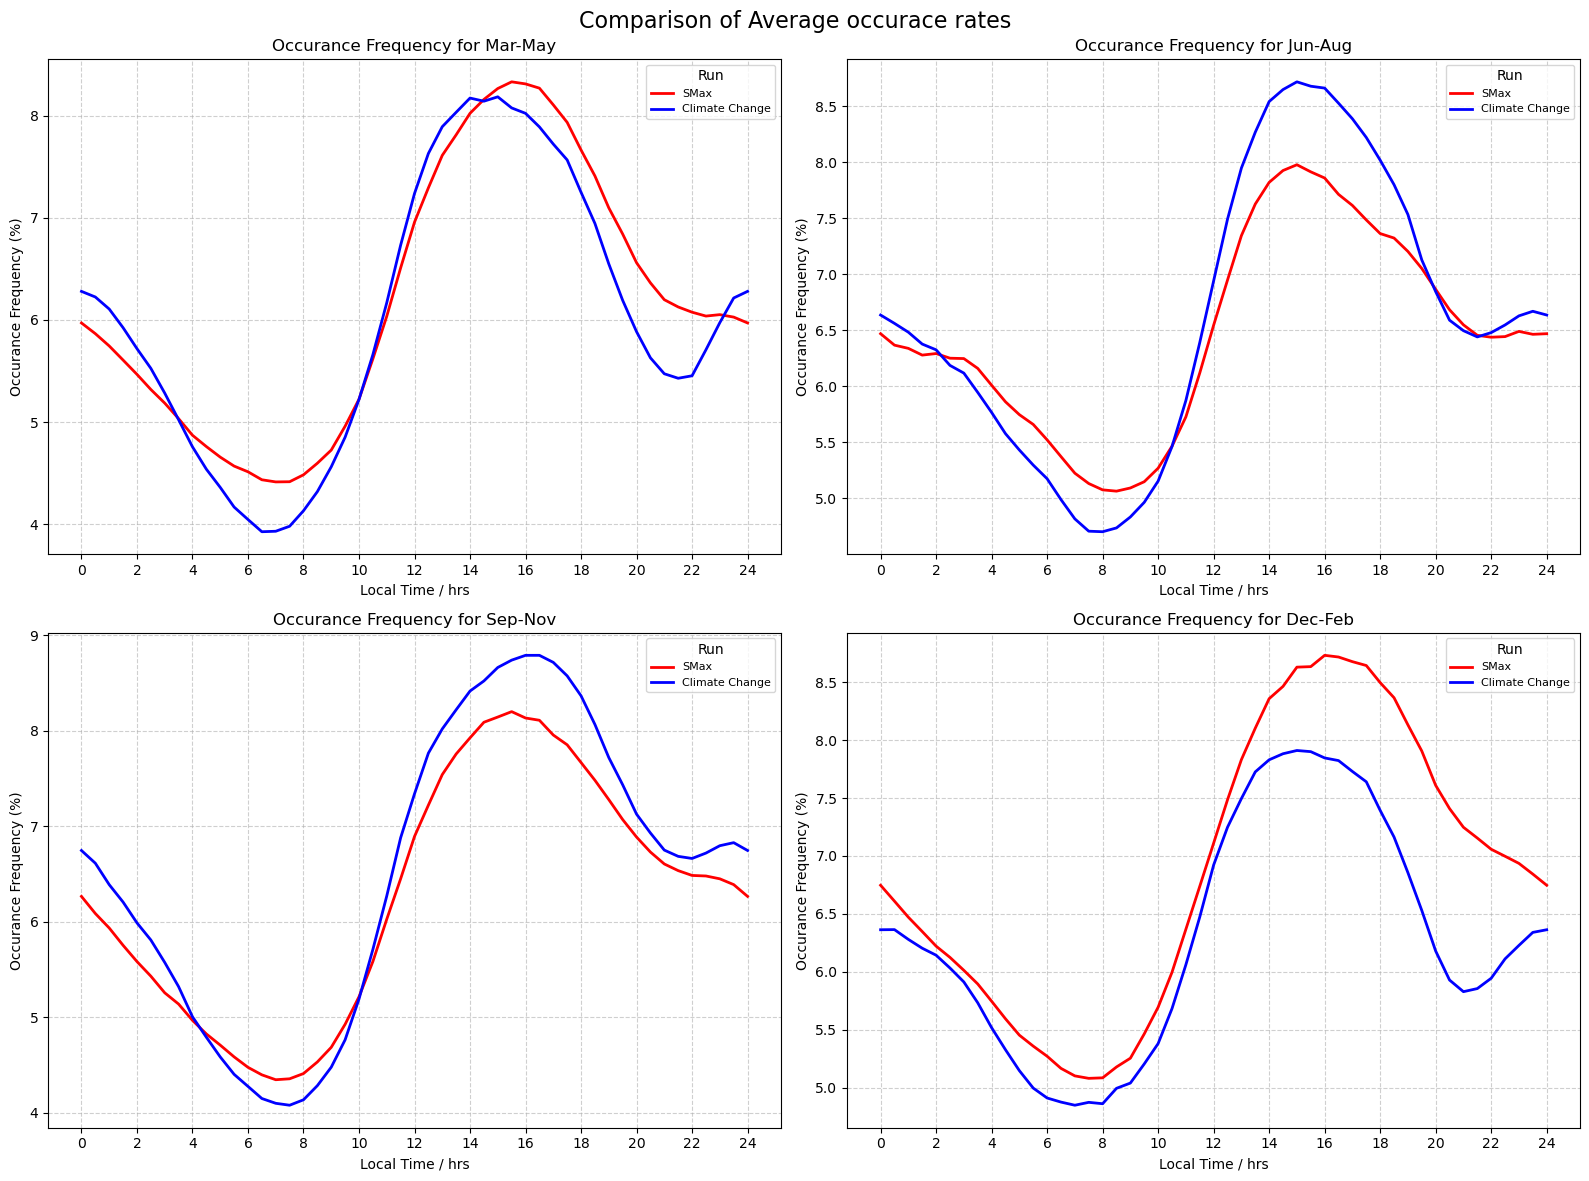

In [13]:
plot_Lat_LT_average_line_from_netcdf("Nc_Files/seasonal_occurrence_frequency_LT_SMax.nc", "Nc_Files/seasonal_occurrence_frequency_LT_cli_cha.nc")